In [105]:
import json
import math
from matplotlib import pyplot as plt
from pydantic import BaseModel, StrictBool, StrictInt, StrictStr, StrictFloat, ValidationError

In [106]:
class CameraData(BaseModel):
    hasLeft: StrictBool
    hasRight: StrictBool
    leftDistance: StrictInt
    regionsCount: StrictInt
    regionsListSize: StrictStr
    unchangedLeft: StrictBool
    unchangedRight: StrictBool

class MotorData(BaseModel):
    leftSpeed: StrictInt
    rightSpeed: StrictInt

class Vec3(BaseModel):
    x: StrictInt
    y: StrictInt
    z: StrictInt

class SensorData(BaseModel):
    accel: Vec3
    gyro: Vec3
    mag: Vec3

class SteerData(BaseModel):
    angle: StrictFloat
    servoPosition: StrictInt

class Data(BaseModel):
    camera: CameraData
    mode: StrictInt
    motor: MotorData
    sensor: SensorData
    steer: SteerData
    timestamp: StrictInt

class Record(BaseModel):
    data: Data
    time: StrictInt

In [107]:
class DataPlotter:
    DATA_FOLDER = '../Data'

    def __init__(self, filename: str) -> None:
        self.data: list[Data]

        with open(f'{self.DATA_FOLDER}/{filename}') as fd:
            data = json.load(fd)
        try:
            self.data = [Record.model_validate(d).data for d in data]
        except ValidationError:
            self.data = [Data.model_validate(d) for d in data]

        self.left_speed = [d.motor.leftSpeed for d in self.data]
        self.right_speed = [d.motor.rightSpeed for d in self.data]
        self.servo_position = [d.steer.servoPosition for d in self.data]
        self.accel_x = [d.sensor.accel.x for d in self.data]
        self.accel_y = [d.sensor.accel.y for d in self.data]
        self.accel_z = [d.sensor.accel.z for d in self.data]
        self.mag_x = [d.sensor.mag.x for d in self.data]
        self.mag_y = [d.sensor.mag.y for d in self.data]
        self.mag_z = [d.sensor.mag.z for d in self.data]
        self.gyro_x = [d.sensor.gyro.x for d in self.data]
        self.gyro_y = [d.sensor.gyro.y for d in self.data]
        self.gyro_z = [d.sensor.gyro.z for d in self.data]

    def __len__(self) -> int:
        return len(self.data)

    def plot_all(self):
        _, axs = plt.subplots(4, 3, figsize=(15, 10))
        axs_flatten = axs.flatten()

        axs_flatten[0].plot(self.left_speed)
        axs_flatten[0].set_title('Left Speed')
        axs_flatten[1].plot(self.right_speed)
        axs_flatten[1].set_title('Right Speed')
        axs_flatten[2].plot(self.servo_position)
        axs_flatten[2].set_title('Servo Position')
        axs_flatten[3].plot(self.accel_x)
        axs_flatten[3].set_title('Accel X')
        axs_flatten[4].plot(self.accel_y)
        axs_flatten[4].set_title('Accel Y')
        axs_flatten[5].plot(self.accel_z)
        axs_flatten[5].set_title('Accel Z')
        axs_flatten[6].plot(self.gyro_x)
        axs_flatten[6].set_title('Gyro X')
        axs_flatten[7].plot(self.gyro_y)
        axs_flatten[7].set_title('Gyro Y')
        axs_flatten[8].plot(self.gyro_z)
        axs_flatten[8].set_title('Gyro Z')
        axs_flatten[9].plot(self.mag_x)
        axs_flatten[9].set_title('Mag X')
        axs_flatten[10].plot(self.mag_y)
        axs_flatten[10].set_title('Mag Y')
        axs_flatten[11].plot(self.mag_z)
        axs_flatten[11].set_title('Mag Z')

        plt.tight_layout()
        plt.show()

    def plot_accels(self):
        accels = [d.sensor.accel for d in self.data]
        accels = [math.sqrt(a.x ** 2 + a.y ** 2 + a.z ** 2) for a in accels]
        plt.plot(accels)
        plt.show()


# Manual

In [108]:
manual = DataPlotter('ManualData.json')

len(manual)

12747

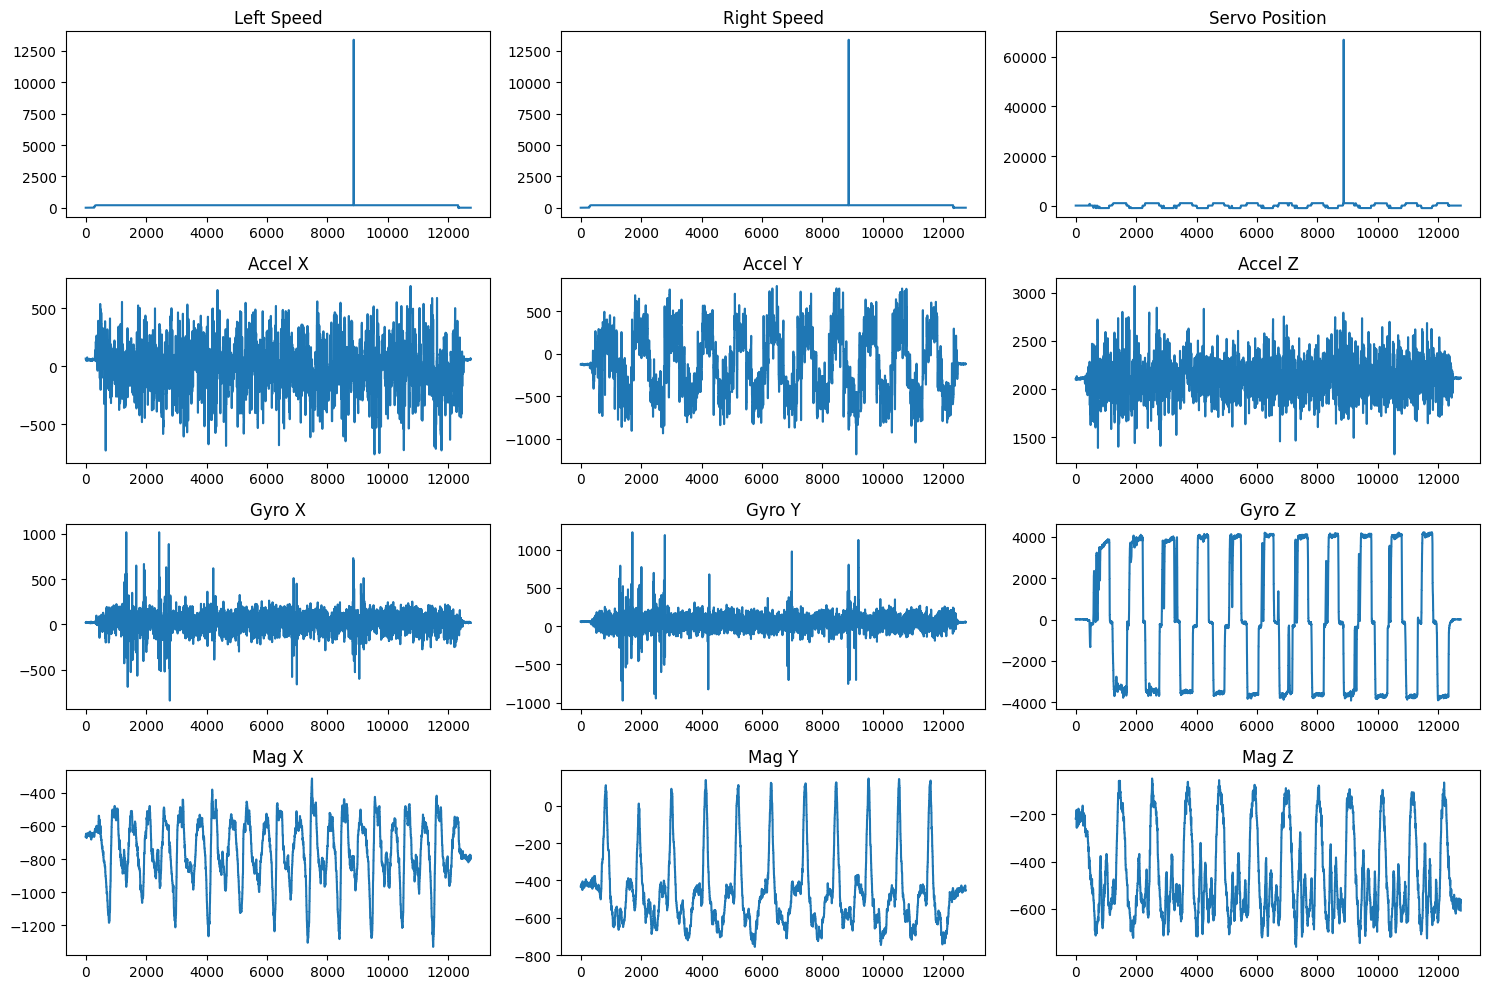

In [109]:
manual.plot_all()

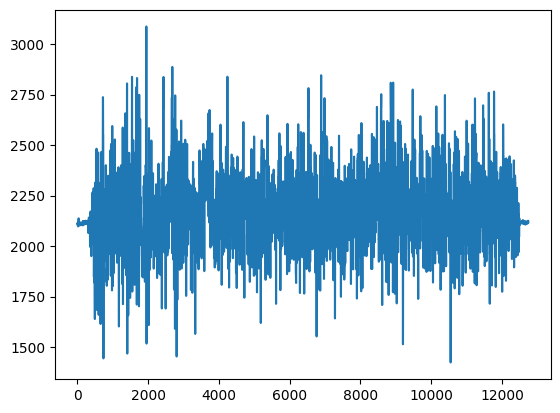

In [110]:
manual.plot_accels()

# Manual Filtered

In [111]:
manual_filtered = DataPlotter('ManualDataFiltered.json')

len(manual_filtered)

12747

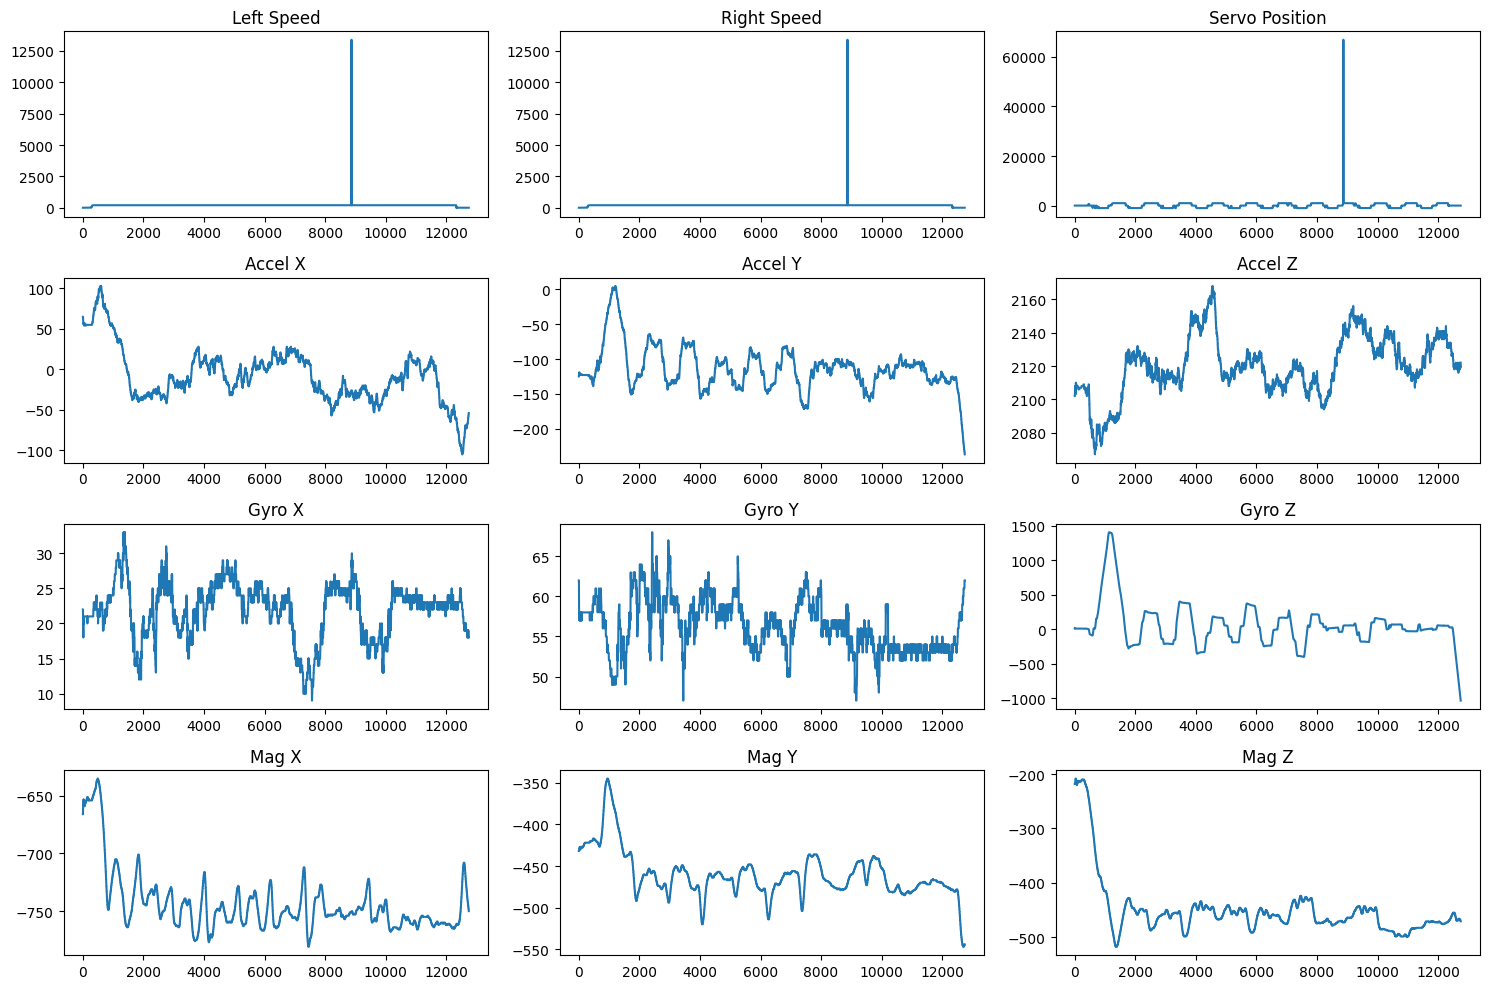

In [112]:
manual_filtered.plot_all()

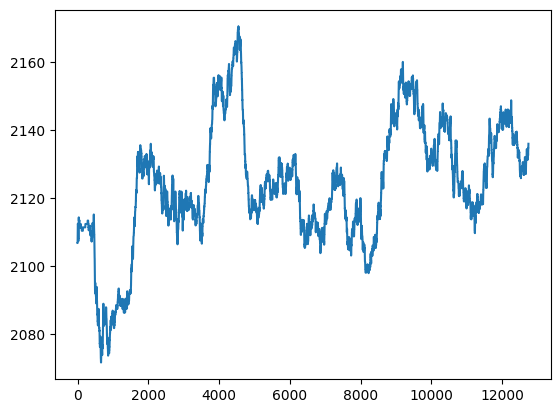

In [113]:
manual_filtered.plot_accels()

# Automatic

In [114]:
auto = DataPlotter('AutoData.json')

len(auto)

4591

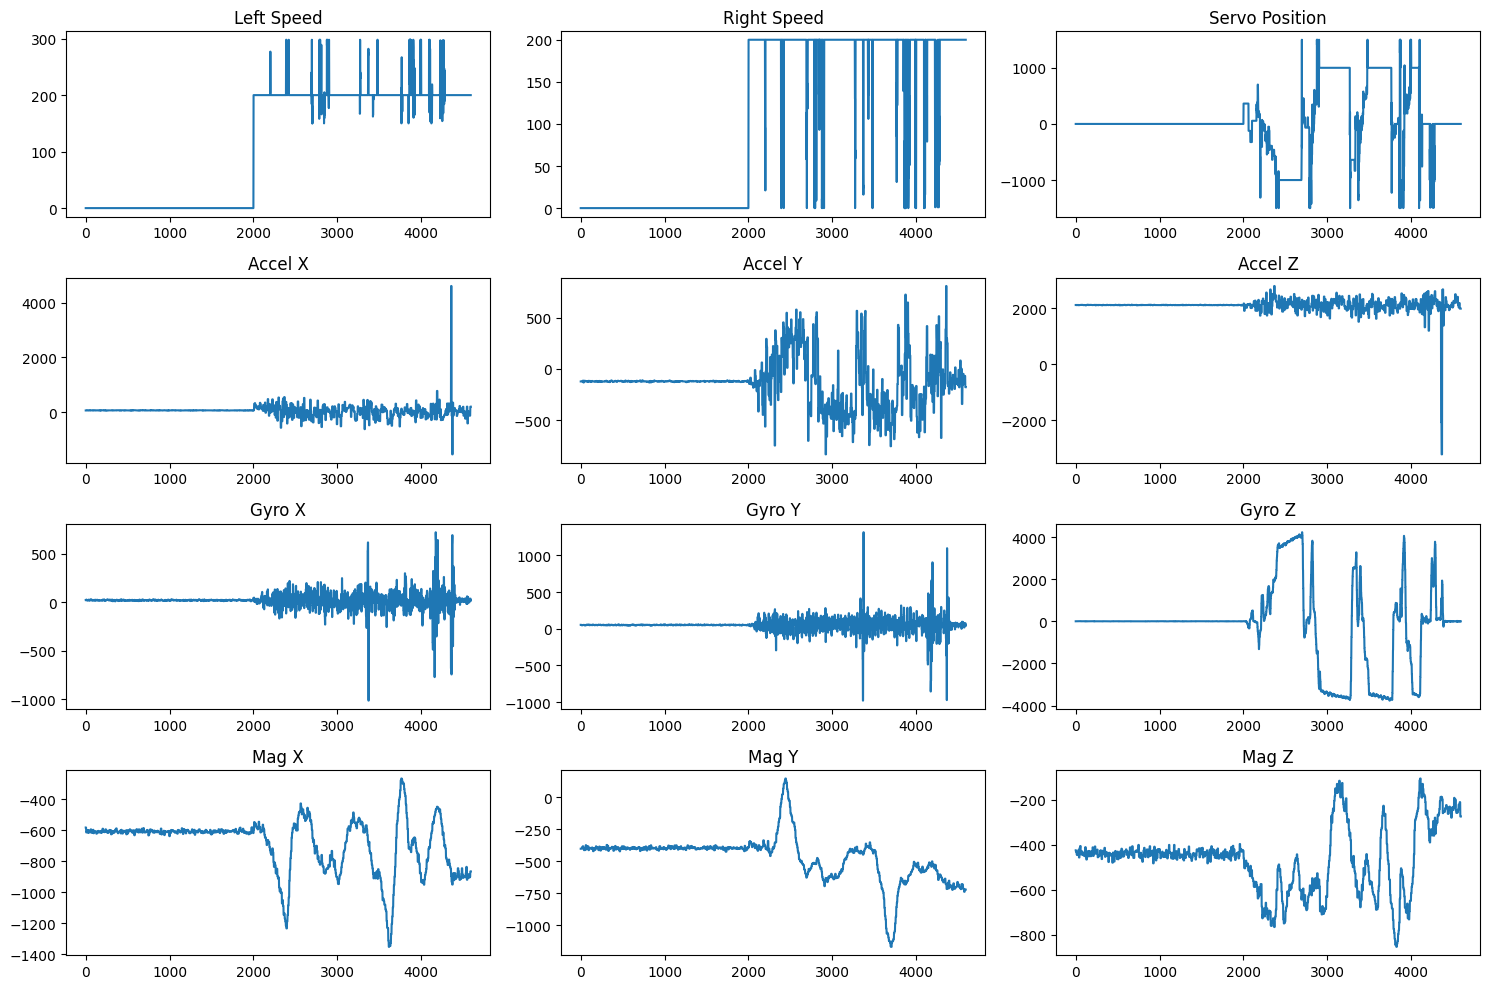

In [115]:
auto.plot_all()

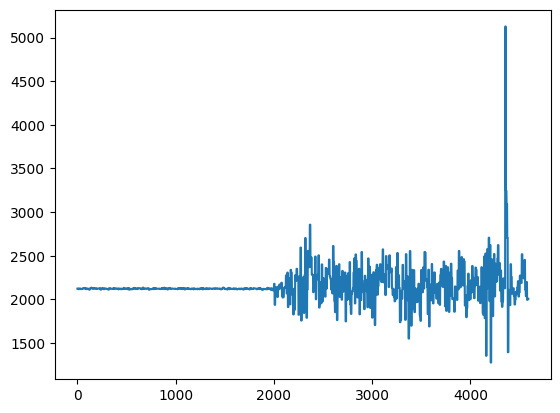

In [116]:
auto.plot_accels()

# Auto Filtered

In [117]:
auto_filtered = DataPlotter('AutoDataFiltered.json')

len(auto_filtered)

4591

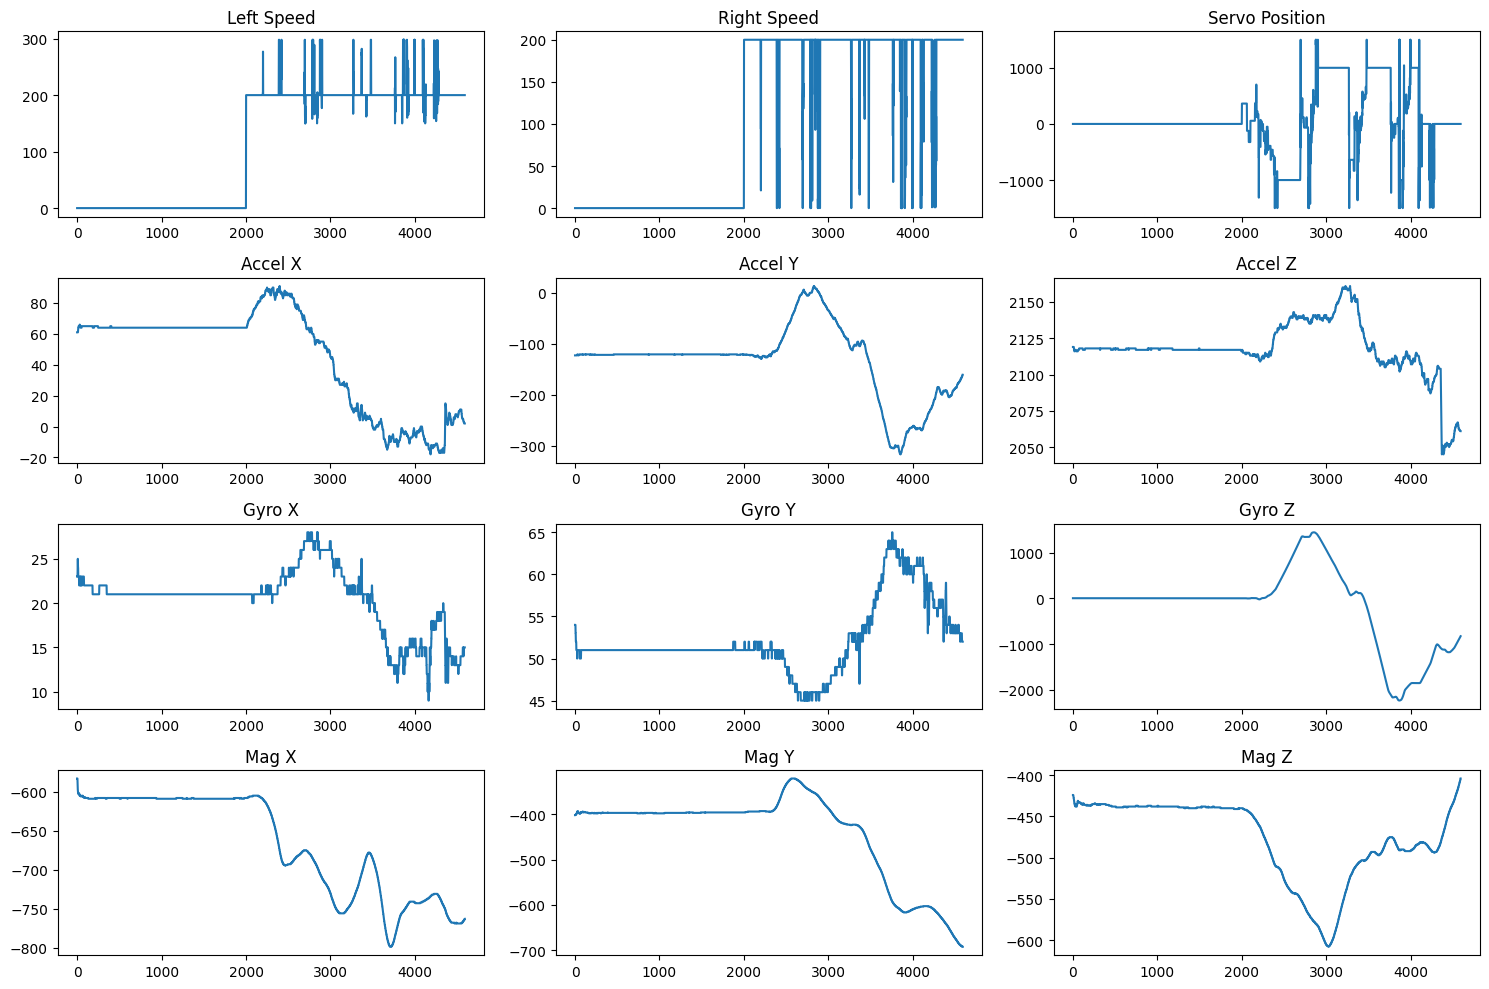

In [118]:
auto_filtered.plot_all()

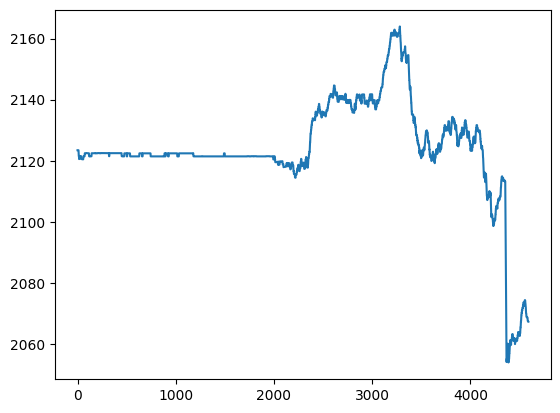

In [119]:
auto_filtered.plot_accels()